In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("./data/pre-processed-metrics-dataframe.pkl")

In [3]:
df.columns

Index(['dag', 'system', 'scheduler', 'completed', 'makespan', 'exec_time',
       'run_stats.scheduling_time', 'run_stats.total_task_time',
       'run_stats.total_network_traffic', 'run_stats.total_network_time',
       'run_stats.max_used_cores', 'run_stats.max_used_memory',
       'run_stats.max_cpu_utilization', 'run_stats.max_memory_utilization',
       'run_stats.cpu_utilization', 'run_stats.memory_utilization',
       'run_stats.used_resource_count', 'run_stats.cpu_utilization_used',
       'run_stats.memory_utilization_used', 'run_stats.cpu_utilization_active',
       'run_stats.memory_utilization_active', 'run_stats.expected_makespan',
       'dag_path', 'system_path', 'dag_nodes', 'dag_edges', 'dag_density',
       'speedup', 'processor_count', 'core_count', 'efficiency_processors',
       'efficiency_cores', 'network_bandwidth', 'network_latency',
       'network_model', 'SLR', 'workflow', 'CCR', 'test_id', 'system_type'],
      dtype='object')

In [4]:
df.workflow.nunique()

10

In [5]:
import matplotlib.pyplot as plt

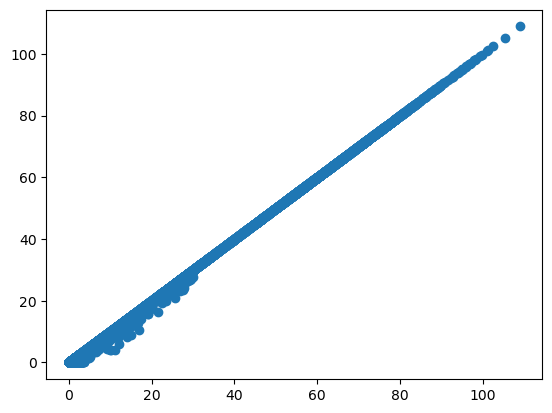

In [6]:
plt.scatter(x=df["exec_time"], y=df["run_stats.scheduling_time"])

In [7]:
df[["exec_time", "run_stats.scheduling_time"]].corr()

,exec_time,run_stats.scheduling_time
exec_time,1.00000,0.99903
run_stats.scheduling_time,0.99903,1.00000


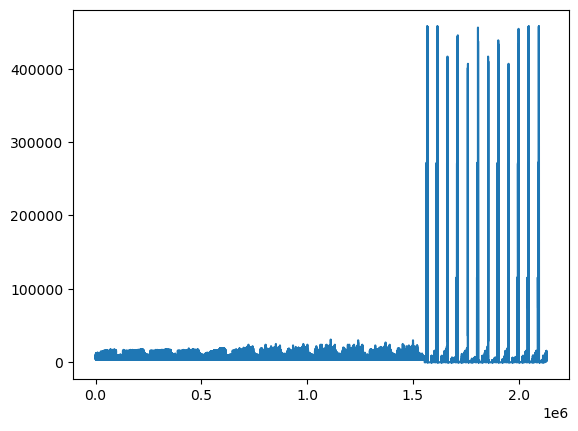

In [8]:
plt.plot(df["run_stats.max_used_memory"])

In [9]:
import seaborn as sns

<Axes: >

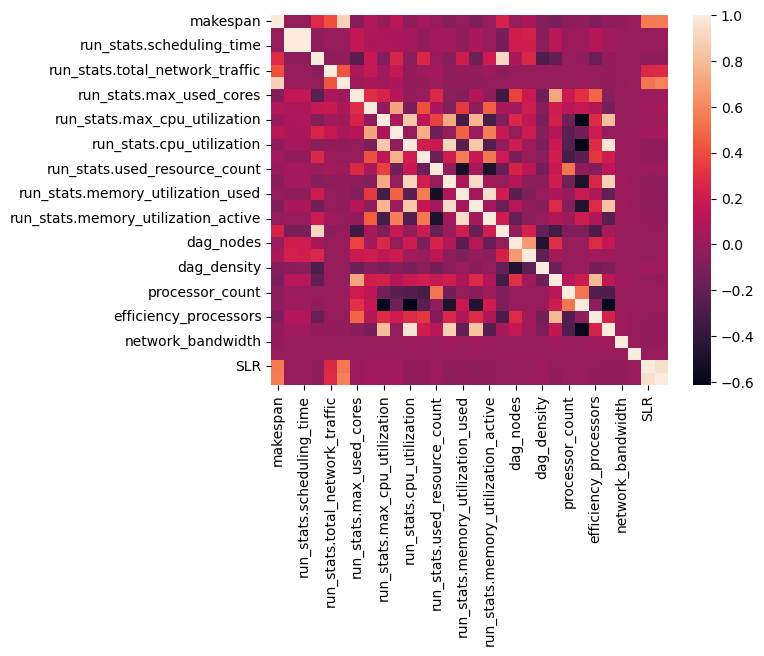

In [10]:
sns.heatmap(df[['makespan', 'exec_time',
       'run_stats.scheduling_time', 'run_stats.total_task_time',
       'run_stats.total_network_traffic', 'run_stats.total_network_time',
       'run_stats.max_used_cores', 'run_stats.max_used_memory',
       'run_stats.max_cpu_utilization', 'run_stats.max_memory_utilization',
       'run_stats.cpu_utilization', 'run_stats.memory_utilization',
       'run_stats.used_resource_count', 'run_stats.cpu_utilization_used',
       'run_stats.memory_utilization_used', 'run_stats.cpu_utilization_active',
       'run_stats.memory_utilization_active', 'run_stats.expected_makespan',
       'dag_nodes', 'dag_edges', 'dag_density',
       'speedup', 'processor_count', 'core_count', 'efficiency_processors',
       'efficiency_cores', 'network_bandwidth', 'network_latency',
                'SLR', 'CCR']].corr())

In [11]:
df_dropped = df.drop(["completed", "run_stats.expected_makespan",
         "dag_path", "system_path", "run_stats.scheduling_time"                     
                     ], axis=1)

In [12]:
# df_dropped.to_csv("./data/dropped.csv")

In [13]:
midpoint = len(df_dropped) // 2
df_splt1 = df_dropped.iloc[:midpoint, :]
df_splt2 = df_dropped.iloc[midpoint:, :]

In [14]:
# max sheet size for excel is 1048576

print(len(df_splt1))
print(len(df_splt2))

1065312
1065312


In [15]:
df_splt1.to_csv("./data/dropped1.csv")
df_splt2.to_csv("./data/dropped2.csv")

In [16]:
# with pd.ExcelWriter("./data/dropped.xlsx", engine="openpyxl") as writer:
#     df_splt1.to_excel(writer, sheet_name="part1", index=False)
#     df_splt2.to_excel(writer, sheet_name="part2", index=False)